In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [10]:
tracks = pd.read_csv('./data/tracks.csv')
tracks = tracks.drop(['id'], axis=1)
tracks.head()

,artist_name,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_popularity,genres,track_popularity,subjectivity,polarity
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",69,low,neutral
1,Britney Spears,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,"['dance_pop', 'pop', 'post-teen_pop']",83,low,neutral
2,Beyoncé,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,"['dance_pop', 'pop', 'r&b']",25,high,negative
3,Justin Timberlake,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,"['dance_pop', 'pop']",79,low,neutral
4,Shaggy,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,"['pop_rap', 'reggae_fusion']",2,low,neutral


In [18]:
feature_set = pd.read_csv('./data/feature_set.csv')
new_feature_set = feature_set.drop(['id'], axis=1)
new_feature_set.head()

,genre_21st_century_classical,genre_432hz,genre__hip_hop,genre__roll,genre_a_cappella,genre_abstract_beats,genre_abstract_hip_hop,genre_accordion,genre_acid_jazz,genre_acid_rock,...,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_popularity,track_popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1626,0.168547,0.025156,0.006245,0.001401,0.00942,0.162325,0.114421,0.148,0.142268
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1676,0.178715,0.023701,0.005000,0.005025,0.04840,0.185170,0.130453,0.168,0.171134
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1516,0.170210,0.043659,0.000478,0.000000,0.01196,0.140481,0.090525,0.172,0.051546
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1428,0.171892,0.029314,0.040361,0.000047,0.01042,0.163727,0.092087,0.164,0.162887
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1212,0.176541,0.014823,0.011265,0.000000,0.06260,0.131062,0.086421,0.150,0.004124


In [19]:
new_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34440 entries, 0 to 34439
Columns: 2178 entries, genre_21st_century_classical to track_popularity
dtypes: float64(2178)
memory usage: 572.3 MB


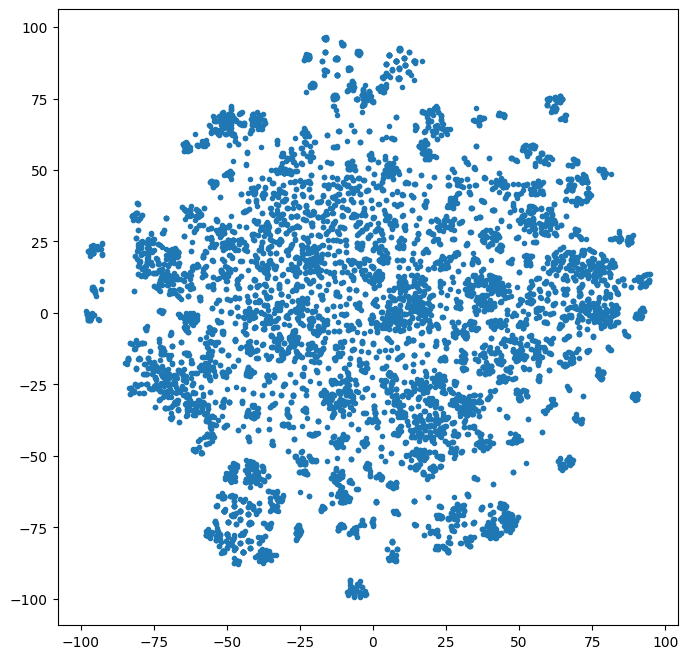

In [26]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(new_feature_set.head(10000))

plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], marker='.')
plt.show()